#Overview of What You'll Learn:

In this tutorial, we will cover the training and evaluation  of Convolutional Neural Network model on Cifar10 Dataset. You will learn how to build, train, and evaluate a CNN using TensorFlow and Keras. Additionally, we will explore GPU acceleration to speed up the training process.



#Importing Necessary Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

###The CIFAR-10 dataset

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.


Here are the classes in the dataset:

1. Airplane
2. Automobile
3. Bird
4. Cat
5. Deer
6. Dog
7. Frog
8. Horse
9. Ship
10. Truck


In [ ]:
# Keras provides convenient functions to load popular datasets.
# Load and preprocess the CIFAR-10 dataset

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
# Visualize a single image using matplotlib
def show_example(image, label, i):
    plt.figure(figsize = (1,1))
    plt.imshow(image[i])
    plt.xlabel("Label: " + str(label[i][0]))
    plt.show()

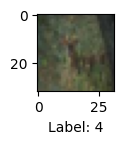

In [ ]:
i=10
show_example(train_images, train_labels, i)

In [ ]:
# Split the dataset into training and validation sets
val_size = 5000
train_images, val_images = train_images[val_size:], train_images[:val_size]
train_labels, val_labels = train_labels[val_size:], train_labels[:val_size]

In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(val_images.shape)
print(val_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(45000, 32, 32, 3)
(45000, 1)
(5000, 32, 32, 3)
(5000, 1)
(10000, 32, 32, 3)
(10000, 1)


Creating TensorFlow data loaders for training and validation datasets. These data loaders are essential for efficiently iterating through the data during training.

In [ ]:
# Create TensorFlow data loaders
batch_size = 128

#We create a TensorFlow dataset (train_ds) from the training images and labels.
#The "from_tensor_slices" method is used to create a dataset from tensors. It essentially pairs each training image with its corresponding label.
train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_ds = train_ds.shuffle(buffer_size=10000).batch(batch_size)

val_ds = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_ds = val_ds.shuffle(buffer_size=10000).batch(batch_size)

#Defining our Model

First Conv2d Layer:

Number of filters = 32 (also known as kernels or channels) in this convolutional layer.

Size of each filter = (3, 3). In this case, it's a 3x3 filter.

Activation='relu' specifies the ReLU (Rectified Linear Unit) activation function, which is applied element-wise after the convolution operation.

Input_shape=(32, 32, 3) defines the input shape of the first layer. It indicates that the input data should have a shape of 32x32 pixels with 3 color channels (RGB).

MaxPooling2d Layer:

Max-pooling reduces the spatial dimensions of the feature maps by taking the maximum value in each 2x2 region.

In [ ]:
# Define a CNN model using Keras

model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

#Compiling our Model

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Fitting our Model

In [ ]:
# Train the model
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
352/352 [==============================] - 14s 9ms/step - loss: 1.7039 - accuracy: 0.3714 - val_loss: 1.4401 - val_accuracy: 0.4836
Epoch 2/10
352/352 [==============================] - 3s 7ms/step - loss: 1.3619 - accuracy: 0.5093 - val_loss: 1.2723 - val_accuracy: 0.5330
Epoch 3/10
352/352 [==============================] - 3s 8ms/step - loss: 1.2058 - accuracy: 0.5716 - val_loss: 1.1114 - val_accuracy: 0.6098
Epoch 4/10
352/352 [==============================] - 2s 7ms/step - loss: 1.0890 - accuracy: 0.6184 - val_loss: 1.0618 - val_accuracy: 0.6206
Epoch 5/10
352/352 [==============================] - 2s 7ms/step - loss: 1.0073 - accuracy: 0.6460 - val_loss: 1.0462 - val_accuracy: 0.6334
Epoch 6/10
352/352 [==============================] - 3s 8ms/step - loss: 0.9498 - accuracy: 0.6681 - val_loss: 0.9869 - val_accuracy: 0.6612
Epoch 7/10
352/352 [==============================] - 3s 7ms/step - loss: 0.8955 - accuracy: 0.6867 - val_loss: 0.9313 - val_accuracy: 0.6832
Epoch

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.8582 - accuracy: 0.7038
Test accuracy: 0.7038000226020813


In [ ]:
# Predict a single image from the test dataset
def predict_image(image, model):
    image = np.expand_dims(image, axis=0)
    predictions = model.predict(image)
    label = np.argmax(predictions)
    return label


1/1 [==============================] - 0s 218ms/step
Predicted label: 5


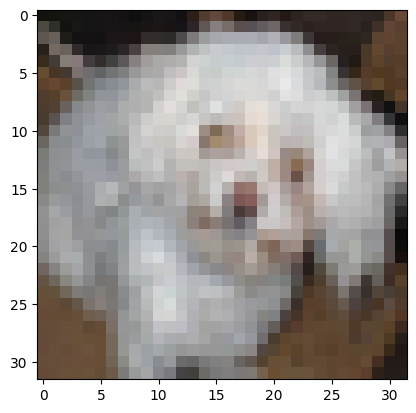

In [ ]:
i = 1000
sample_image = test_images[i]
predicted_label = predict_image(sample_image, model)
plt.imshow(sample_image)
print(f'Predicted label: {predicted_label}')

#Transfer Learning

#VGG16

In [ ]:
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras import layers, models

In [ ]:
# Create transfer learning models (VGGNet)
#Create a VGG16 model with pre-trained weights from ImageNet, but without the final classification layers,
#and configures it to accept input images of size 32x32 pixels with 3 color channels.

vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
#This code sets all layers in the pre-trained model to be non-trainable (frozen)
#by looping through the layers and setting their trainable property to False.
for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
# Create a custom top for the pre-trained models
#This function provides a convenient way to create a custom classifier for various pre-trained models.
#It allows us to fine-tune these models for specific classification tasks by changing the number of output units
#in the last dense layer to match the number of classes in your dataset.

def create_custom_top(model):
    top_model = models.Sequential()
    top_model.add(layers.Flatten(input_shape=model.output_shape[1:]))
    top_model.add(layers.Dense(256, activation='relu'))
    top_model.add(layers.Dense(10, activation='softmax'))  # Adjust to match the number of classes in your dataset
    return top_model

In [ ]:
vgg_top = create_custom_top(vgg_model)

In [ ]:
# Combine the pre-trained model with the custom top
vgg_transfer_model = models.Model(inputs=vgg_model.input, outputs=vgg_top(vgg_model.output))

In [ ]:
vgg_transfer_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
# Compile the models
vgg_transfer_model.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

In [ ]:
# Train the models (you can use the same data loaders created previously)
history_vgg = vgg_transfer_model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
352/352 [==============================] - 10s 24ms/step - loss: 1.4379 - accuracy: 0.5027 - val_loss: 1.2722 - val_accuracy: 0.5552
Epoch 2/10
352/352 [==============================] - 7s 19ms/step - loss: 1.2159 - accuracy: 0.5794 - val_loss: 1.2137 - val_accuracy: 0.5778
Epoch 3/10
352/352 [==============================] - 7s 21ms/step - loss: 1.1577 - accuracy: 0.5971 - val_loss: 1.1615 - val_accuracy: 0.5952
Epoch 4/10
352/352 [==============================] - 7s 19ms/step - loss: 1.1135 - accuracy: 0.6120 - val_loss: 1.1452 - val_accuracy: 0.6032
Epoch 5/10
352/352 [==============================] - 7s 19ms/step - loss: 1.0779 - accuracy: 0.6233 - val_loss: 1.1394 - val_accuracy: 0.6016
Epoch 6/10
352/352 [==============================] - 7s 19ms/step - loss: 1.0490 - accuracy: 0.6353 - val_loss: 1.1171 - val_accuracy: 0.6088
Epoch 7/10
352/352 [==============================] - 7s 19ms/step - loss: 1.0189 - accuracy: 0.6465 - val_loss: 1.1132 - val_accuracy: 0.611

In [ ]:
# Evaluate the models on the test dataset
test_loss_vgg, test_acc_vgg = vgg_transfer_model.evaluate(test_images, test_labels)

In [ ]:
# Predict a single image from the test dataset
def predict_image(image, model):
    image = np.expand_dims(image, axis=0)
    predictions = model.predict(image)
    label = np.argmax(predictions)
    return label

1/1 [==============================] - 0s 464ms/step
Predicted label: 5


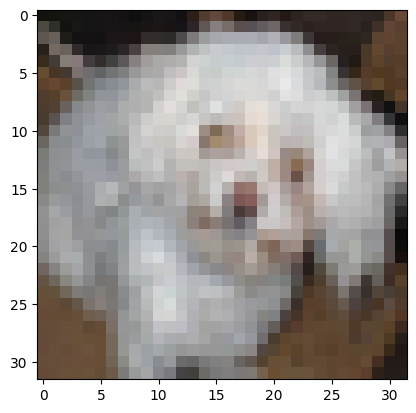

In [ ]:
i = 1000
sample_image = test_images[i]
predicted_label = predict_image(sample_image, vgg_transfer_model)
plt.imshow(sample_image)
print(f'Predicted label: {predicted_label}')

#ResNet

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

In [ ]:
# Create transfer learning models (ResNet50)
#Create a ResNet50 model with pre-trained weights from ImageNet, but without the final classification layers,
#and configures it to accept input images of size 32x32 pixels with 3 color channels.
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
#This code sets all layers in the pre-trained model to be non-trainable (frozen)
#by looping through the layers and setting their trainable property to False.
for layer in resnet_model.layers:
    layer.trainable = False

In [ ]:
resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 38, 38, 3)            0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 16, 16, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 16, 16, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
# Create a custom top for the pre-trained models
#This function provides a convenient way to create a custom classifier for various pre-trained models.
#It allows us to fine-tune these models for specific classification tasks by changing the number of output units
#in the last dense layer to match the number of classes in your dataset.

def create_custom_top(model):
    top_model = models.Sequential()
    top_model.add(layers.Flatten(input_shape=model.output_shape[1:]))
    top_model.add(layers.Dense(512, activation='relu'))
    top_model.add(layers.Dense(256, activation='relu'))
    top_model.add(layers.Dense(10, activation='softmax'))  # Adjust to match the number of classes in your dataset
    return top_model

In [ ]:
#Calling the function to create a custom classifier for various ResNet50.
resnet_top = create_custom_top(resnet_model)

In [ ]:
resnet_transfer_model = models.Model(inputs=resnet_model.input, outputs=resnet_top(resnet_model.output))

In [ ]:
resnet_transfer_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 38, 38, 3)            0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 16, 16, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 16, 16, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
resnet_transfer_model.compile(optimizer='adam',
                             loss='sparse_categorical_crossentropy',
                             metrics=['accuracy'])

In [ ]:
history_resnet = resnet_transfer_model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
352/352 [==============================] - 13s 26ms/step - loss: 2.0999 - accuracy: 0.2287 - val_loss: 1.9229 - val_accuracy: 0.2886
Epoch 2/10
352/352 [==============================] - 7s 19ms/step - loss: 1.8805 - accuracy: 0.3138 - val_loss: 1.7998 - val_accuracy: 0.3380
Epoch 3/10
352/352 [==============================] - 7s 20ms/step - loss: 1.8404 - accuracy: 0.3279 - val_loss: 1.8855 - val_accuracy: 0.3222
Epoch 4/10
352/352 [==============================] - 7s 21ms/step - loss: 1.7933 - accuracy: 0.3485 - val_loss: 1.8804 - val_accuracy: 0.3072
Epoch 5/10
216/352 [=================>............] - ETA: 2s - loss: 1.7766 - accuracy: 0.3578

In [ ]:
test_loss_resnet, test_acc_resnet = resnet_transfer_model.evaluate(test_images, test_labels)

In [ ]:
# Predict a single image from the test dataset
def predict_image(image, model):
    image = np.expand_dims(image, axis=0)
    predictions = model.predict(image)
    label = np.argmax(predictions)
    return label

In [ ]:
i = 1000
sample_image = test_images[i]
predicted_label = predict_image(sample_image, resnet_transfer_model)
plt.imshow(sample_image)
print(f'Predicted label: {predicted_label}')